In [1]:
# 3 observable trends
# 1. It is naturally assumed that it is hotter closer to the equator, it is still as hot +/- up to 40 degrees latitude north and south of the equator
# 2. Humidity and Cloudiness are also higher closer to the equator. This makes sense since there is are only 2 real seasons on the equator - dry and wet. The rainy season has higher humidity and cloudiness which causes rain 200 days of the year
# 3. What surprises me is that the wind speed does not seem to be as high closer to the equator. I would think that the jet streams are more prevelant at the center bulge of the earth, but the data does not show that. The wind seems to be the same at the equator as it does +40 degrees latitude away from the equator.

3.0

In [2]:
#dependencies
from config import api_key
import pandas as pd
import numpy as np
from citipy import citipy
import matplotlib.pyplot as plt
import matplotlib
import random
import requests

import time

# styling for plots
plt.style.use("seaborn")

In [3]:
# Getting a sample that is representative of the world cities.

# Set Lat & Lon Zones to randomly pick coordinates - So, we have some from each region.
lat_zone = np.arange(-90,90,10)
lon_zone = np.arange(-180,180,10)


# Creating a new data frame to hold randomly picked coordinates and corresponding city information
cities_df = pd.DataFrame()

cities_df["Latitude"] = ""
cities_df["Longitude"] = ""

# From each zone, randomly pick 50 unique coordinates and adding to the dataframe.
for x in lat_zone:
    for y in lon_zone:
        x_values = list(np.arange(x,x+10,0.01))
        y_values = list(np.arange(y,y+10,0.01))
        lats = random.sample(x_values,50)
        lons = random.sample(y_values,50)
        lat_samples = [(x+dec_lat) for dec_lat in lats]
        lon_samples = [y+dec_lon for dec_lon in lons]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,
                                       "Longitude":lon_samples}))
cities_df = cities_df.reset_index(drop=True)
# cities_df.head()

In [4]:
# For the selected coordinates, use citipy to associate them with nearest city.

cities_df["Closest City name"] = ""
cities_df["Closest Country code"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"Closest City name",city.city_name)
    cities_df.set_value(index,"Closest Country code",city.country_code)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [5]:
# Dropping random lat and lon samples from dataframe as they are not the exact coordinates for the cities.

clean_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
clean_cities_df

# Dropping duplicate cities which may have resulted in the previous step
clean_cities_df = clean_cities_df.drop_duplicates()

clean_cities_df.shape

(1498, 2)

In [6]:
# Picking a sample of 500 cities to proceed with analysis
selected_cities = clean_cities_df.sample(500)

selected_cities = selected_cities.reset_index(drop=True)

In [7]:
# Setting up values for OpenWeatherMap API calls
base_url = "http://api.openweathermap.org/data/2.5/weather?"

app_id = api_key
# ["open_weather_map_common"]

params = { "appid" :app_id,"units":"imperial" }

# Save config information
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "London"
# units = "metric"

# # Build query URL
query_url = base_url + "appid=" + app_id
# + "&q=" + city + "&units=" + units
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=b3bc32244a3e26e235839c20122c40c5


In [12]:


for index,row in selected_cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f'Retrieving weather information for {params["q"]}')
    city_weather_resp = requests.get(base_url,params)
    city_weather_resp  = city_weather_resp.json()
    selected_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    selected_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    selected_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    selected_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    selected_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    selected_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))
    time.sleep(5)
    

Retrieving weather information for oktyabrskoye,ru


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[

Retrieving weather information for calvinia,za
Retrieving weather information for meulaboh,id
Retrieving weather information for yendi,gh
Retrieving weather information for amderma,ru
Retrieving weather information for andapa,mg
Retrieving weather information for maryville,us
Retrieving weather information for mongu,zm
Retrieving weather information for tanjong malim,my
Retrieving weather information for anshun,cn
Retrieving weather information for plettenberg bay,za
Retrieving weather information for iracoubo,gf
Retrieving weather information for paka,my
Retrieving weather information for kangaatsiaq,gl
Retrieving weather information for kalmunai,lk
Retrieving weather information for daru,pg
Retrieving weather information for mehamn,no
Retrieving weather information for huntsville,ca
Retrieving weather information for upernavik,gl
Retrieving weather information for luderitz,na
Retrieving weather information for divnoye,ru
Retrieving weather information for naze,jp
Retrieving weather i

Retrieving weather information for uramita,co
Retrieving weather information for peniche,pt
Retrieving weather information for kommunisticheskiy,ru
Retrieving weather information for gua musang,my
Retrieving weather information for zaqatala,az
Retrieving weather information for mondovi,it


ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [13]:
# Drop cities with missing information
selected_cities = selected_cities.dropna()

selected_cities.shape
selected_cities.to_csv("City_Weather_data.csv")

In [14]:
# Plot settings
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

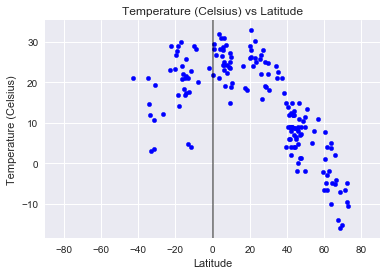

In [15]:
# Temperature vs Latitude 
selected_cities.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")

set_plot_prop("Latitude",[-90,90],"Temperature (F)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Temperature vs Latitude")
plt.show()

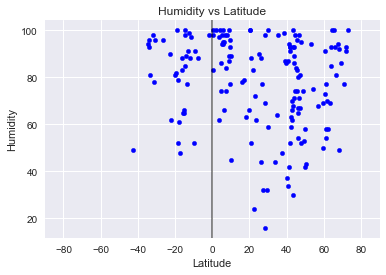

In [16]:
# Humidity vs Latitude 

selected_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")

set_plot_prop("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Humidity vs Latitude")
plt.show()

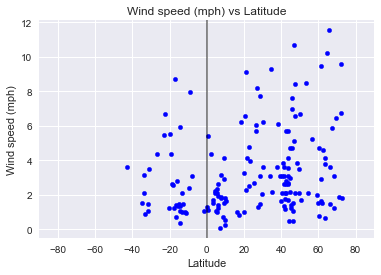

In [17]:
# Wind speed vs Latitude
selected_cities["Wind speed"] = pd.to_numeric(selected_cities["Wind speed"])
selected_cities.plot(kind="scatter",x="Latitude",y="Wind speed",grid=True,color="blue")

set_plot_prop("Latitude",[-90,90],"Wind speed (mph)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Wind speed vs Latitude")
plt.show()

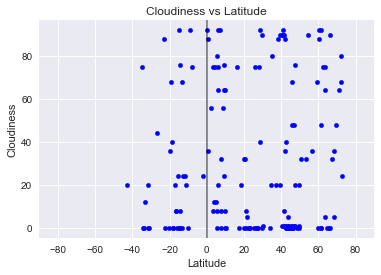

In [18]:
# Cloudiness vs Latitude
selected_cities["Cloudiness"] = pd.to_numeric(selected_cities["Cloudiness"])
selected_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")

set_plot_prop("Latitude",[-90,90],"Cloudiness")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Cloudiness vs Latitude")
plt.show()

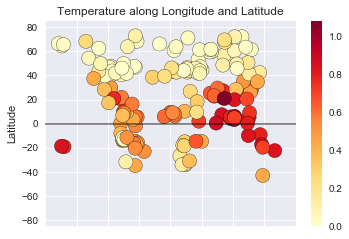

In [19]:
# Temperature approaching equator
size_temp = np.round((((selected_cities.Temperature)/100)**2)*10,2)

selected_cities.plot(kind="scatter",x="Longitude",y="Latitude",grid=True, edgecolor="black",
                     c=size_temp,s=200,cmap=plt.cm.YlOrRd)
plt.xlabel("Longitude")
plt.tight_layout()
plt.title("Temperature along Longitude and Latitude")
plt.ylabel("Latitude")
plt.ylim([-85,85])
plt.grid(True)

plt.xlim([-200,200])
plt.subplots_adjust(bottom=.25, left=.25)

plt.axhline(0, color='black',alpha=0.5)
plt.savefig("Temperature approaching Equator")

plt.show()